## 1. Peak finding and tree generation

This notebook illustrates the generation of the tree of peaks from a spectra.


First, Metek MIRA35 observations on the 22nd Aug 2019 from Punta Arenas, Chile are used.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime

import sys, os
sys.path.append('../')
import peakTree
import peakTree.helpers as h


In [3]:
%matplotlib inline

In [8]:
pTB = peakTree.peakTreeBuffer(config_file='../instrument_config.toml', system='Lacros_Pun')

# the default peak finding settings are loaded from the instrument config.toml file
pTB.settings

{'decoupling': -30,
 'grid_time': 7,
 'max_no_nodes': 15,
 'polarimetry': 'LDR',
 'smooth_cut_sequence': 'sc',
 'station_altitude': 9,
 'peak_finding_params': {'roll_velocity': 3.2,
  'thres_factor_co': 2.5,
  'thres_factor_cx': 3.5,
  'cal_offset': 0,
  'tail_filter': True,
  't_avg': 6,
  'h_avg': 0,
  'span': 0.3,
  'smooth_polyorder': 2,
  'prom_thres': 0.3,
  'width_thres': 0.0}}

keys  dict_keys(['time', 'range', 'velocity', 'Z', 'LDR', 'SNRco'])
time  [1.56646080e+09 1.56646080e+09 1.56646080e+09 1.56646081e+09
 1.56646081e+09 1.56646081e+09 1.56646081e+09 1.56646082e+09
 1.56646082e+09 1.56646082e+09]
range  [155.89599609 187.07519531 218.25439453 249.43359375 280.61279297
 311.79199219 342.97119141 374.15039062 405.32958984 436.50878906]
velocity  [-10.51483491 -10.47360026 -10.43236562 -10.39113097 -10.34989632
 -10.30866168 -10.26742703 -10.22619238 -10.18495774 -10.14372309]
Z chunking  [512, 83, 20]
noise est -62.94 -> -62.94
tail criterion?  2.0617323355331507 > 1.4588231479108604
noise est -62.66 -> -62.66
tail criterion?  1.8143244552691726 > 1.872053542137798
noise est -59.52 -> -59.52
tail criterion?  2.0617323355331507 > 1.5728857561819234
noise est -57.46 -> -57.46
tail criterion?  1.7730898085585096 > 1.696619498069416


../peakTree/generate_tree.py:804: RuntimeWarning: invalid value encountered in true_divide
  moments, _ = calc_moments(spectrum, traversed[i]['bounds'], traversed[i]['thres'])


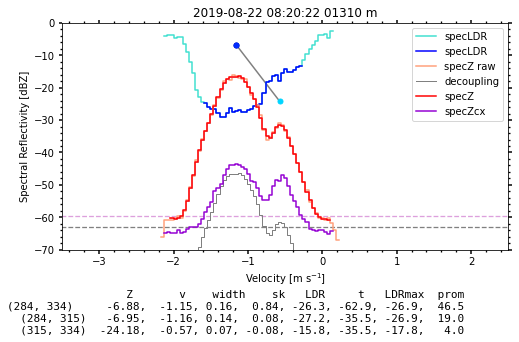

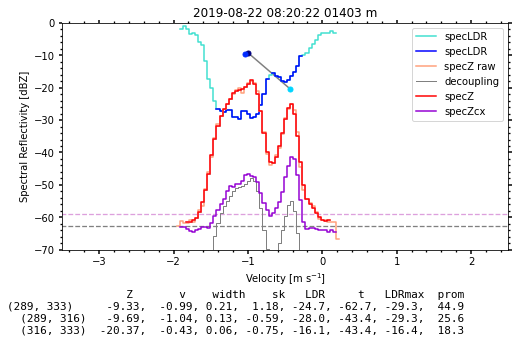

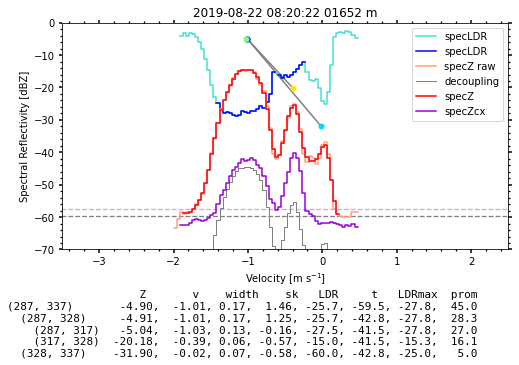

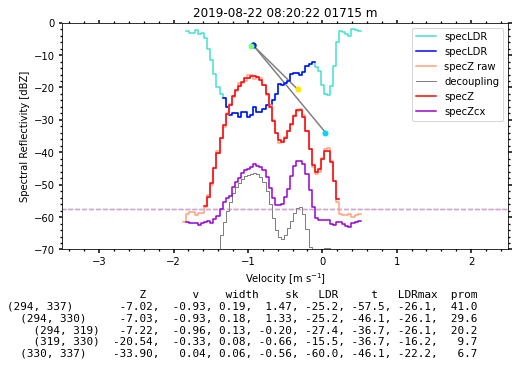

In [9]:
pTB.load('../data/D20190822_T0800_0900_Pun_zspc2nc_v2.0_standard.nc4')
# pTB.settings['thres_factor_co'] = 6

specs = [
    (h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1300),
    (h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1400),
    (h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1650),
    (h.dt_to_ts(datetime.datetime(2019, 8, 22, 8, 20, 22)), 1700),
]

plot_path = 'plots/'
if not os.path.isdir(plot_path):
    os.mkdir(plot_path)
    
for ts, rg in specs:
    tree, spectrum = pTB.get_tree_at(ts, rg)
      
    
    fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
    ax.set_xlim([-3.5, 2.5])
    ax.set_ylim([-70, 0])
       
    dt=h.ts_to_dt(spectrum['ts'])
    savename = '{}_{:0>5.0f}m_spectrum.png'.format(dt.strftime('%Y-%m-%d_%H%M%S'), spectrum['range'])
#   fig.savefig(plot_path + savename, dpi=250)

### Reminder binary tree structure

<br />
<div>
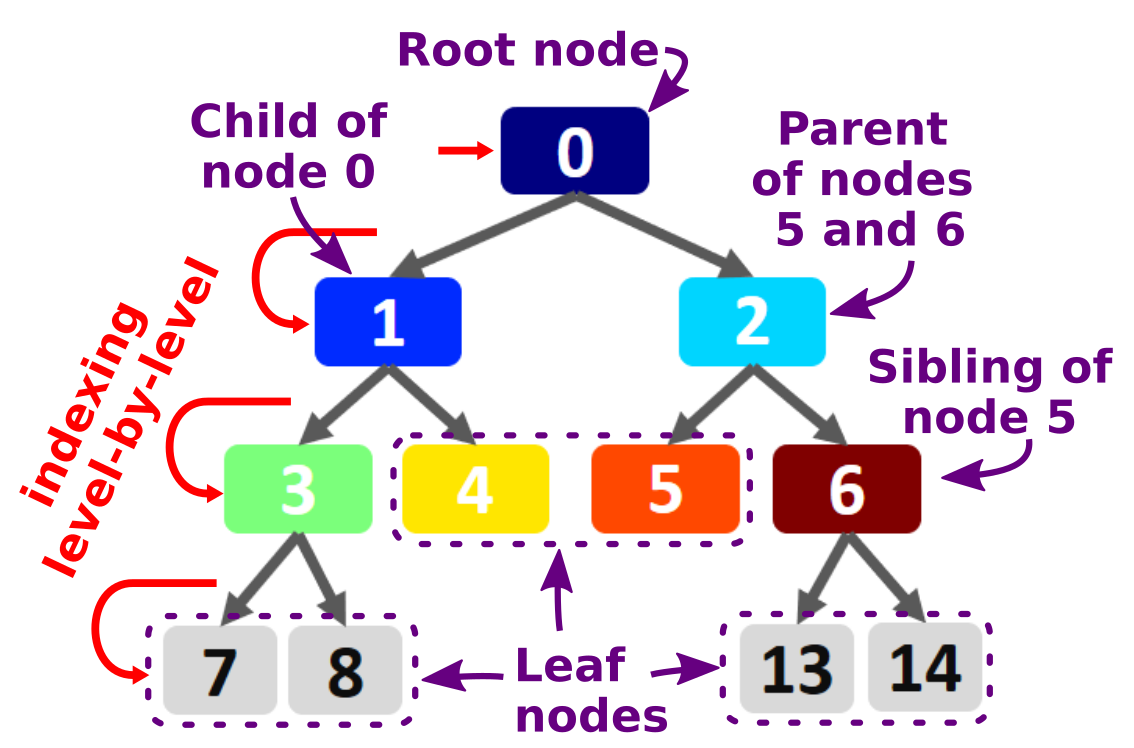
</div>

noise est -62.94 -> -62.94
tail criterion?  2.1442016289544767 > 1.4640209345172666
noise est -62.66 -> -62.66
tail criterion?  1.8967937486904987 > 1.9031349269260793
noise est -59.52 -> -59.52
tail criterion?  2.0617323355331507 > 1.6057216744756486
noise est -57.46 -> -57.46
tail criterion?  1.7730898085585096 > 1.7146774649406575


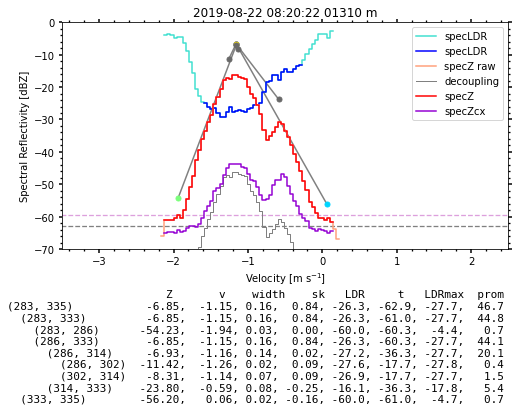

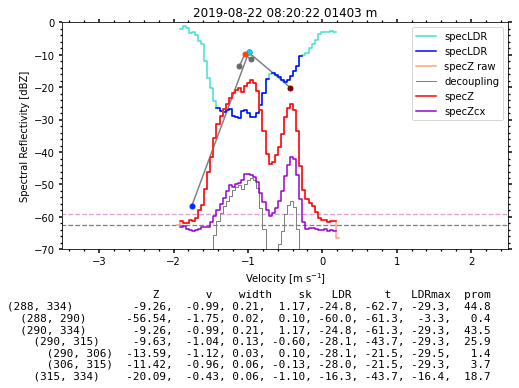

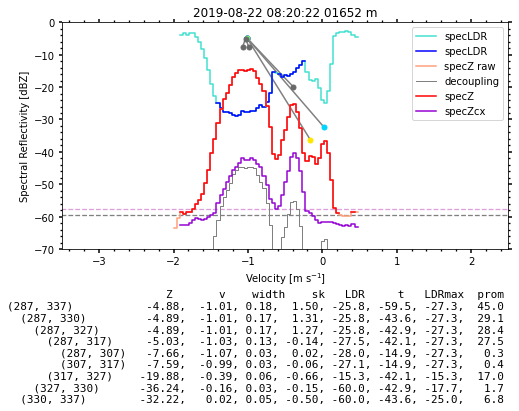

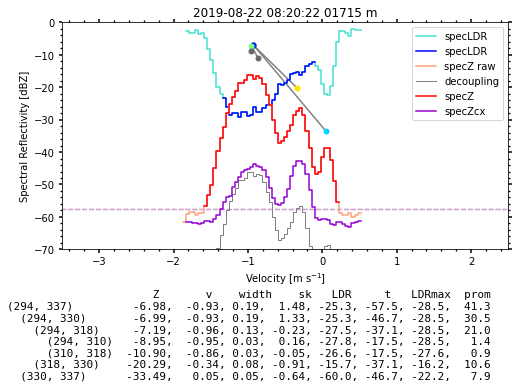

In [11]:
# let's modify some of the settings
pTB.settings['peak_finding_params']['span'] = 0.1
pTB.settings['peak_finding_params']['prom_thres'] = 0.1

for ts, rg in specs:
    tree, spectrum = pTB.get_tree_at(ts, rg)
    
    fig, ax = peakTree.print_tree.plot_spectrum(tree, spectrum, None)
    ax.set_xlim([-3.5, 2.5])
    ax.set_ylim([-70, 0])
       
    dt=h.ts_to_dt(spectrum['ts'])
    savename = '{}_{:0>5.0f}m_spectrum.png'.format(dt.strftime('%Y-%m-%d_%H%M%S'), spectrum['range'])
#   fig.savefig(plot_path + savename, dpi=250)

### Exercises

- experiment with different peak finding parameters
- use the ones obtained with peako
- try the same for the colocated RPG FMCW94 spectra